In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import logit

In [68]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [69]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df = df.drop(columns=['Q_1'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv,Fat_Occu_Coded,Mot_Occu_coded,Income_Coded,Age_Coded
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,Business,Housewife,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Business,Housewife,Lower Middle Income,Adult
2,Female,26,10,115000,Dead,Dead,Yes,Primary,Very much,Good,Rural,No,Average,Business,Housewife,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Agree,Business,Housewife,Lower Middle Income,Adult
3,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very much,Good,Urban,No,Average,Business,Business,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Neutral,Business,Business,Lower Middle Income,Adult


In [70]:
for i in [i for i in df.columns if df[i].dtype=='object']:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out  No  Yes
Q_2              
Female    29   46
Male      37   98
------------------
Drop_out  No  Yes
Q_6              
Adults    63  119
Dead       0    4
Seniors    0   14
------------------
Drop_out  No  Yes
Q_7              
Adults    66  141
Dead       0    3
------------------
Drop_out  No  Yes
Drop_out         
No        66    0
Yes        0  144
------------------
Drop_out          No  Yes
Q_8                      
Higher Education  25    7
Primary           24   93
Secondary         17   44
------------------
Drop_out   No  Yes
Q_9               
Less        5   41
Neutral     9   18
Very much  52   85
------------------
Drop_out  No  Yes
Q_10             
Average   11   73
Bad        2   16
Good      53   55
------------------
Drop_out  No  Yes
Q_11             
Rural     36  117
Urban     30   27
------------------
Drop_out        No  Yes
Q_12                   
No               0   91
Not Applicable  66    0
Yes              0   53
------------------
Drop_out  No  Ye

In [71]:
df = df.drop(columns=['Q_6', 'Q_7', 'Q_10', 'Q_12', 'Q_14', 'Q_15', 'Q_17', 'Q_20', 'Q_35_iii', 'Q_35_iv','Q_37_i', 'Q_37_iii', 'Q_37_iv', 'Q_37_vi', 'Q_37_vii', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv', 'Mot_Occu_coded'])

In [72]:
data = df.copy()
data.head(2)

,Q_2,Q_3,Q_4,Q_5,Drop_out,Q_8,Q_9,Q_11,Q_13,Q_16,Q_18,Q_19,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_v,Q_35_vi,Q_36,Q_37_ii,Q_37_v,Q_37_viii,Q_37_ix,Fat_Occu_Coded,Income_Coded,Age_Coded
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Yes,Primary,Less,Rural,Average,No,7,6,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not much,Good,Neutral,Yes,No,No,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Business,Lower Middle Income,Adult
2,Female,26,10,115000,Yes,Primary,Very much,Rural,Average,Yes,8,7,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not much,Good,Yes,No,No,No,Yes,Yes,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Business,Lower Middle Income,Adult


In [73]:
sig_factors = []
sig_df = pd.DataFrame({'factor':[], 'chi-square':[], 'p-value':[], 'dof':[]})

for i in [i for i in data.columns if data[i].dtype=='object' and i != 'Drop_out']:
    crs = pd.crosstab(index=data['Drop_out'], columns=data[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    tdf = {'factor': i, 'chi-square': stat, 'p-value': p, 'dof': dof}
    sig_df = sig_df.append(tdf, ignore_index=True)
    if p<0.05:
        sig_factors.append(i)

sig_factors += [i for i in df.columns if df[i].dtype!='object']
print("Significant factors: ", sig_factors)
sig_df.head()

Significant factors:  ['Q_8', 'Q_9', 'Q_11', 'Q_13', 'Q_16', 'Q_21', 'Q_23', 'Q_24', 'Q_27', 'Q_29', 'Q_31', 'Q_34', 'Q_35_ii', 'Q_35_vi', 'Q_36', 'Fat_Occu_Coded', 'Income_Coded', 'Age_Coded', 'Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']


,factor,chi-square,p-value,dof
0,Q_2,2.337753,1.262716e-01,1.0
1,Q_8,39.205451,3.066511e-09,2.0
2,Q_9,11.775996,2.772521e-03,2.0
3,Q_11,14.997912,1.076302e-04,1.0
4,Q_13,20.369585,3.773991e-05,2.0


In [74]:
in_sig = [i for i in data.columns if i not in sig_factors and i != 'Drop_out']
print(in_sig)
data = data.drop(columns=in_sig)
data.dtypes.value_counts()

['Q_2', 'Q_22', 'Q_25', 'Q_26', 'Q_28', 'Q_30', 'Q_32', 'Q_33', 'Q_35_i', 'Q_35_v', 'Q_37_ii', 'Q_37_v', 'Q_37_viii', 'Q_37_ix']


object    19
int64      5
dtype: int64

In [75]:
for i in [i for i in data.columns if data[i].dtype=='object']:
    print(pd.crosstab(index=data[i], columns=data['Drop_out']))
    print("------------------")

Drop_out  No  Yes
Drop_out         
No        66    0
Yes        0  144
------------------
Drop_out          No  Yes
Q_8                      
Higher Education  25    7
Primary           24   93
Secondary         17   44
------------------
Drop_out   No  Yes
Q_9               
Less        5   41
Neutral     9   18
Very much  52   85
------------------
Drop_out  No  Yes
Q_11             
Rural     36  117
Urban     30   27
------------------
Drop_out  No  Yes
Q_13             
Average   32   79
Bad        4   37
Good      30   28
------------------
Drop_out  No  Yes
Q_16             
No        27  115
Yes       39   29
------------------
Drop_out  No  Yes
Q_21             
No        23   30
Yes       43  114
------------------
Drop_out  No  Yes
Q_23             
No        17   79
Yes       49   65
------------------
Drop_out  No  Yes
Q_24             
No        50   73
Yes       16   71
------------------
Drop_out  No  Yes
Q_27             
Rural     32  109
Urban     34   35
----------

In [76]:
# cat = [i for i in data.columns if data[i].dtype=='object']
data = pd.get_dummies(data, columns=['Drop_out'], drop_first=True)
data.head(3)

,Q_3,Q_4,Q_5,Q_8,Q_9,Q_11,Q_13,Q_16,Q_18,Q_19,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_vi,Q_36,Fat_Occu_Coded,Income_Coded,Age_Coded,Drop_out_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,150000,Primary,Less,Rural,Average,No,7,6,Yes,No,No,Rural,Good,Public,Neutral,No,No,Yes,Business,Lower Middle Income,Adult,1
2,26,10,115000,Primary,Very much,Rural,Average,Yes,8,7,No,No,Yes,Rural,Good,Public,Yes,No,Yes,Yes,Business,Lower Middle Income,Adult,1
3,26,6,120000,Primary,Very much,Urban,Average,No,4,4,Yes,No,Yes,Urban,Good,Private,Yes,No,Yes,Yes,Business,Lower Middle Income,Adult,1


In [77]:
fs = "Drop_out_Yes ~ "
for i in data.columns:
    if i != "Drop_out_Yes":
        fs = fs + " + " + i
    
print(fs)

Drop_out_Yes ~  + Q_3 + Q_4 + Q_5 + Q_8 + Q_9 + Q_11 + Q_13 + Q_16 + Q_18 + Q_19 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_vi + Q_36 + Fat_Occu_Coded + Income_Coded + Age_Coded


In [90]:
fs = "Drop_out_Yes ~ Q_3 + Q_4 + Q_8 + Q_11 + Q_16 + Q_18 + Q_19 + Q_21 + Q_23 + Q_24 + Q_27 + Q_31 + Q_36 + Fat_Occu_Coded"
log_reg = logit(formula=fs, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.285740
         Iterations 8


In [91]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Drop_out_Yes   No. Observations:                  210
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           17
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.5410
Time:                        15:07:07   Log-Likelihood:                -60.005
converged:                       True   LL-Null:                       -130.72
Covariance Type:            nonrobust   LLR p-value:                 1.149e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.4615      2.587     -2.884      0.004     -12.532      -2.391
Q_8[T.Primary]               4.1514      0.828      5.012      0.000       2.528       5.775
Q_8[T.Secondary]             3.2589      0.763      4.272      0.000       1.764       4.754
Q_11[T.Urban]               -1.4644      0.899     -1.629      0.103      -3.227       0.298
Q_16[T.Yes]                 -0.9953      0.672     -1.480      0.139      -2.313       0.322
Q_21[T.Yes]                 -0.6306      0.638     -0.989      0.323      -1.881       0.619
Q_23[T.Yes]                  0.1515      0.607      0.249      0.803      -1.039       1.342
Q_24[T.Yes]                 -0.5488      0.686     -0.800      0.424      -1.893       0.795
Q_27[T.Urban]               -0.4500      0.850     -0.529      0.597      -2.117       1.217
Q_31[T.Public]              -0.7945      0.630     -1.261      0.207      -2.029       0.440
Q_36[T.Yes]                 -1.3359      0.634     -2.108      0.035      -2.578      -0.094
Fat_Occu_Coded[T.Farmer]     0.2474      0.659      0.376      0.707      -1.043       1.538
Fat_Occu_Coded[T.Job]       -1.2345      0.798     -1.546      0.122      -2.799       0.331
Fat_Occu_Coded[T.Others]     1.1218      0.825      1.360      0.174      -0.495       2.739
Q_3                          0.3387      0.089      3.790      0.000       0.164       0.514
Q_4                          0.3125      0.304      1.028      0.304      -0.284       0.909
Q_18                        -0.5837      0.374     -1.559      0.119      -1.317       0.150
Q_19                         0.7374      0.291      2.533      0.011       0.167       1.308
============================================================================================
"""

In [92]:
model_odds = pd.DataFrame(np.exp(log_reg.params), columns= ['OR'])
model_odds['p-value']= log_reg.pvalues
model_odds[['Lower', 'Upper']] = np.exp(log_reg.conf_int())
model_odds

,OR,p-value,Lower,Upper
Intercept,0.000575,3.922117e-03,0.000004,0.091512
Q_8[T.Primary],63.521950,5.394261e-07,12.526938,322.108911
Q_8[T.Secondary],26.021608,1.939387e-05,5.833803,116.069079
Q_11[T.Urban],0.231209,1.033572e-01,0.039691,1.346832
Q_16[T.Yes],0.369629,1.387509e-01,0.098977,1.380372
Q_21[T.Yes],0.532274,3.228186e-01,0.152485,1.857995
Q_23[T.Yes],1.163564,8.030075e-01,0.353900,3.825598
Q_24[T.Yes],0.577662,4.235858e-01,0.150640,2.215161
Q_27[T.Urban],0.637623,5.966765e-01,0.120426,3.376034
Q_31[T.Public],0.451812,2.072563e-01,0.131438,1.553077


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [125]:
features = ['Q_8' , 'Q_9', 'Q_23', 'Q_36', 'Fat_Occu_Coded', 'Income_Coded']

In [126]:
X = df[features]
y = df[['Drop_out']]
X.head(2)

,Q_8,Q_9,Q_23,Q_36,Fat_Occu_Coded,Income_Coded
Serial_no,,,,,,
1,Primary,Less,No,Yes,Business,Lower Middle Income
2,Primary,Very much,No,Yes,Business,Lower Middle Income


In [127]:
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded.head(3)

,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very much,Q_23_Yes,Q_36_Yes,Fat_Occu_Coded_Farmer,Fat_Occu_Coded_Job,Fat_Occu_Coded_Others,Income_Coded_Lower Middle Income,Income_Coded_Upper Middle Income
Serial_no,,,,,,,,,,,
1,1,0,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,1,0


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.25, random_state = 0)

In [129]:
print(X_train.shape)
print(X_test.shape)

(157, 11)
(53, 11)


In [130]:
acc_dict = {
    'name': [],
    'accuracy': []
}

Decision Tree
Accuracy -> 86.79 %

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.94      0.86      0.90        37

    accuracy                           0.87        53
   macro avg       0.84      0.87      0.85        53
weighted avg       0.88      0.87      0.87        53



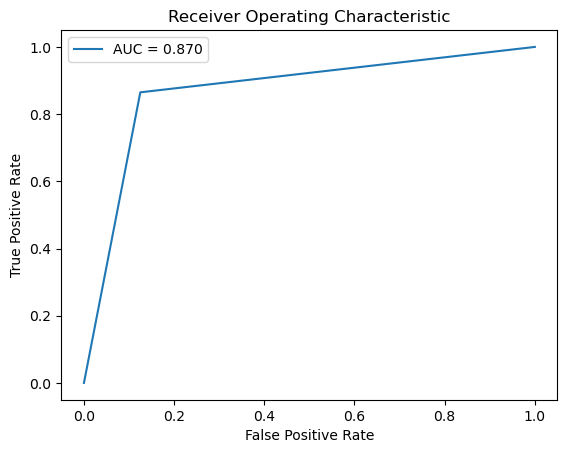

In [131]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Decision Tree")
acc_dict['accuracy'].append(ac)
print("Decision Tree")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

Support Vector Machine
Accuracy -> 86.79 %

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.89      0.92      0.91        37

    accuracy                           0.87        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.87      0.87      0.87        53



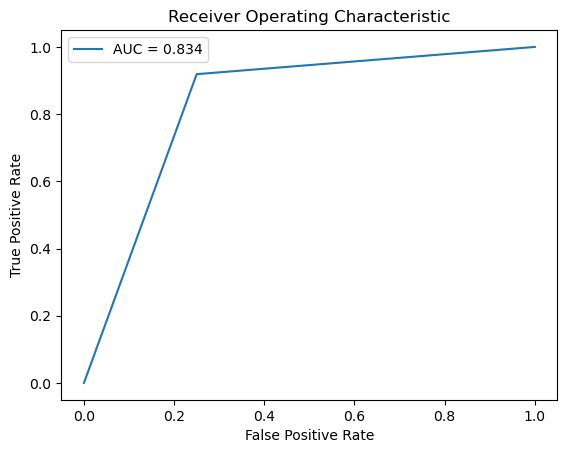

In [132]:
svm = SVC(kernel='rbf')
svm = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("SVM")
acc_dict['accuracy'].append(ac)
print("Support Vector Machine")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

Random Forest
Accuracy -> 79.25 %

              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.84      0.86      0.85        37

    accuracy                           0.79        53
   macro avg       0.75      0.74      0.75        53
weighted avg       0.79      0.79      0.79        53



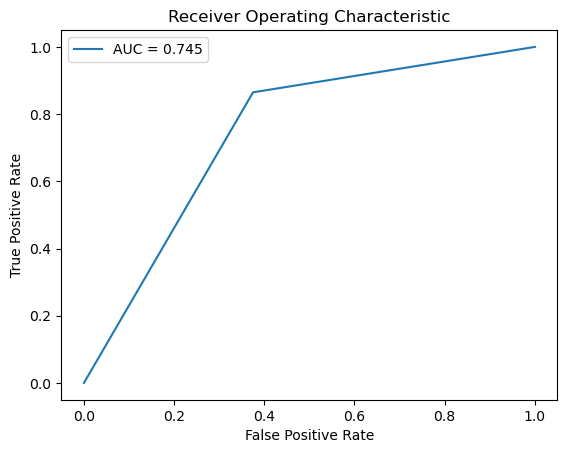

In [133]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Random Forest")
acc_dict['accuracy'].append(ac)
print("Random Forest")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

XGB
Accuracy -> 81.13 %

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.89      0.84      0.86        37

    accuracy                           0.81        53
   macro avg       0.78      0.79      0.78        53
weighted avg       0.82      0.81      0.81        53



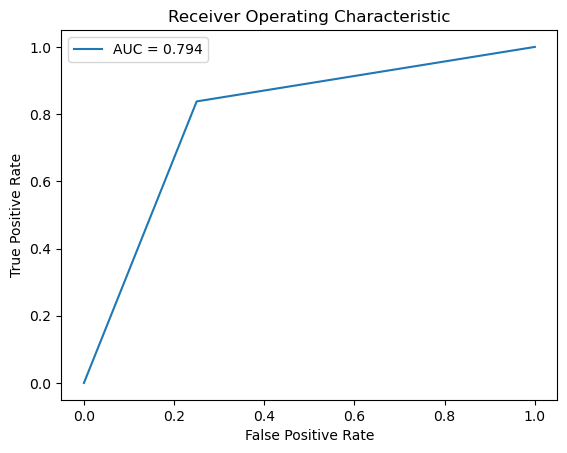

In [134]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("XGB")
acc_dict['accuracy'].append(ac)
print("XGB")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

LR
Accuracy -> 79.25 %

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.82      0.89      0.86        37

    accuracy                           0.79        53
   macro avg       0.76      0.73      0.74        53
weighted avg       0.78      0.79      0.79        53



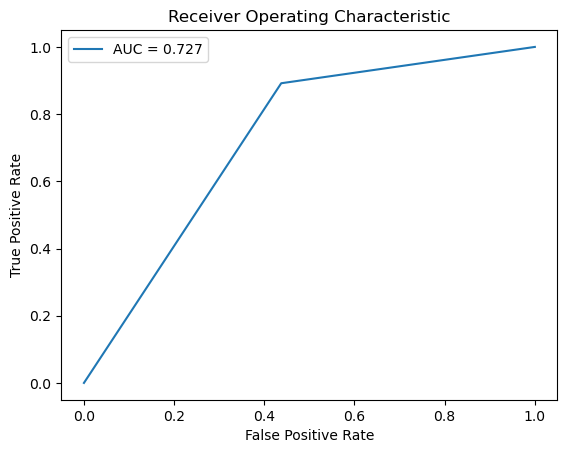

In [135]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
pred = lr.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("LR")
acc_dict['accuracy'].append(ac)
print("LR")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [136]:
# dt = DecisionTreeClassifier()
# dt = dt.fit(X_train, y_train)
# fig = plt.figure(figsize=((25,20)))
# plot_tree(dt,
#             feature_names = X_encoded.columns,
#             class_names=['Yes', 'No'], 
#             impurity=False,
#             proportion=True,
#             filled=True)
# fig.show()

In [137]:
adf = pd.DataFrame(acc_dict)
adf

,name,accuracy
0,Decision Tree,0.867925
1,SVM,0.867925
2,Random Forest,0.792453
3,XGB,0.811321
4,LR,0.792453
